In [175]:
import os
import sys

import warnings 
warnings.filterwarnings('ignore')

# include app-wide functions 
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('utils.py'))))
import utils

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import pickle 
import random
import string
import json

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [87]:
df = utils.load_data()  # cleaned dataset

In [ ]:
#TODO: only allow words occuring at least 3 times + remove stop words (and or i)

## some exploratory data analysis

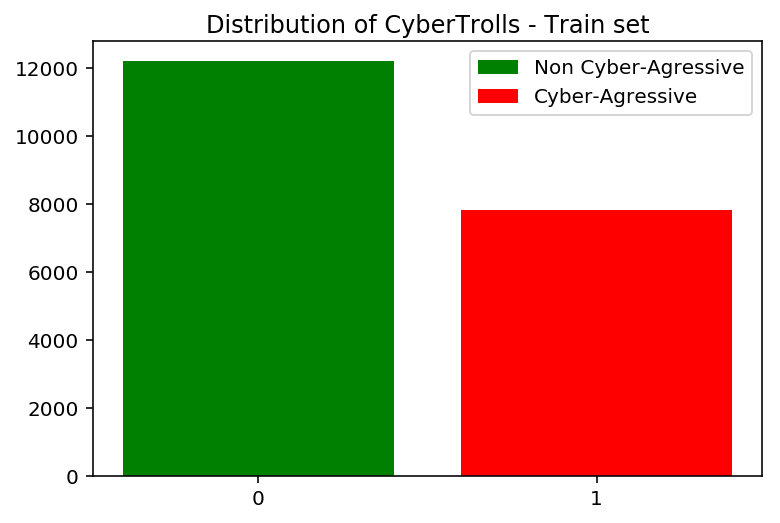

In [88]:
# distribution of cyber trolls vs non-cyber trolls
counter = Counter(df.label)
plt.title('Distribution of CyberTrolls - Train set')
plt.bar(list(counter.keys())[0], list(counter.values())[0], align='center', color='g', label='Non Cyber-Agressive')
plt.bar(list(counter.keys())[1], list(counter.values())[1], align='center', color='r', label='Cyber-Agressive')
plt.xticks(list(set(df.label)))
plt.legend()
plt.show()

In [90]:
# sample some of the online comments
utils.sample_data(df, n=10)  # feature engineering (create number hashtags col?)

Label: 0
Index: 788	uh well suck complainjk

Label: 0
Index: 9969	mmm

Label: 0
Index: 5062	damn trying number list dont need more p

Label: 0
Index: 1167	son cant decide cuz blackberry sooo delish oh yea ill cd find damn blank cd lol

Label: 0
Index: 9286	do you go wit anybody at this moment

Label: 0
Index: 8664	i would love follow r absolutely

Label: 0
Index: 11964	any new exciting news youud like share

Label: 0
Index: 10774	hahhahah yeah you

Label: 0
Index: 190	oh man funny tweet im tear here hahaha i hate mac genuises soooo much

Label: 0
Index: 3028	hi best fucking friend reply me jaja i love you motherfucker mua or cku

Label: 1
Index: 3108	know bambis as nice place lol

Label: 1
Index: 951	i nominate jcroft shorty award downassbitches totally one

Label: 1
Index: 7185	totally the as end jeep life form impacted

Label: 1
Index: 7085	nerd

Label: 1
Index: 7620	lmao i seen dude mad angry got as beat

Label: 1
Index: 3562	i hate wedding u shud grateful male worrying u got wear



In [91]:
# most common words by label
trolls = Counter(' '.join(list(df[df.label == 1].text)).split())
non_trolls = Counter(' '.join(list(df[df.label == 0].text)).split())

print('Cyber Trolls')
print(*trolls.most_common()[:5], sep='\n')
print('\nNon Cyber Trolls')
print(*non_trolls.most_common()[:5], sep='\n')

Cyber Trolls
('i', 2981)
('hate', 1313)
('damn', 1059)
('fuck', 1036)
('as', 1022)

Non Cyber Trolls
('i', 3839)
('hate', 1488)
('damn', 1307)
('im', 988)
('like', 942)


In [3]:
## Save vectorizer in ./model_assets
utils.persist_vectorizer(vectorizer, 'test_v.0.0')    

## text feature extractors

In [92]:
# bag-of-words encoding
enc = utils.build_encoder(df.text, count_vectorizer=True)
count_vectorized = enc.fit_transform(df.text).toarray()

# tf-idf encoding
enc = utils.build_encoder(df.text, tf_idf=True)
tf_idf = enc.fit_transform(df.text).toarray()

print(tf_idf.shape ==  count_vectorized.shape)

True


# Model dev

In [94]:
X_train, X_test, y_train, y_test = train_test_split(count_vectorized, df.label)

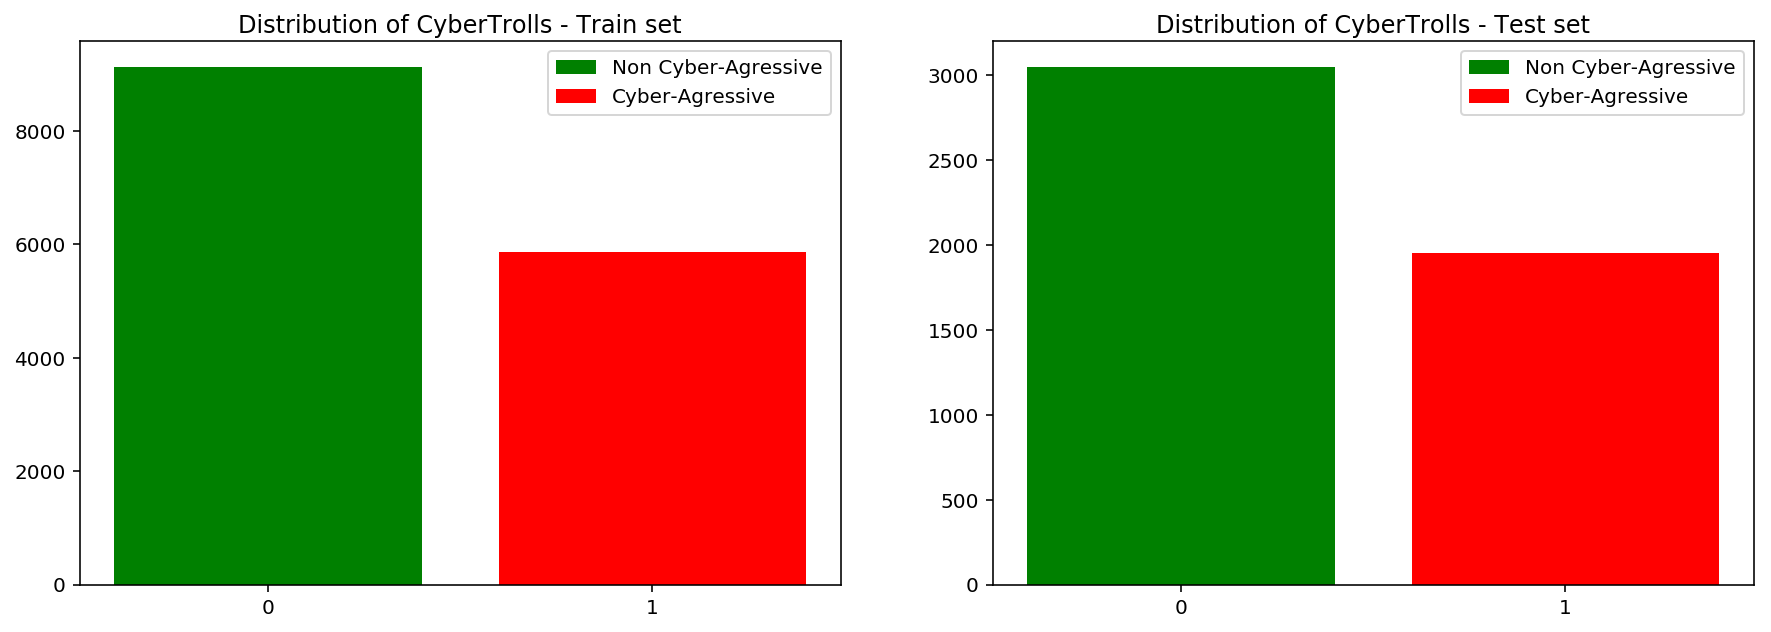

In [95]:
# Show of labels train/test sets
fig, axs = plt.subplots(1, 2, figsize=(15,5))

train_count = Counter(y_train)
axs[0].set_title('Distribution of CyberTrolls - Train set')
axs[0].bar(list(train_count.keys())[0], list(train_count.values())[0], align='center', color='g', label='Non Cyber-Agressive')
axs[0].bar(list(train_count.keys())[1], list(train_count.values())[1], align='center', color='r', label='Cyber-Agressive')
axs[0].set_xticks(list(set(y_train)))
axs[0].legend()

test_count = Counter(y_test)
axs[1].set_title('Distribution of CyberTrolls - Test set')
axs[1].bar(list(test_count.keys())[0], list(test_count.values())[0], align='center', color='g', label='Non Cyber-Agressive')
axs[1].bar(list(test_count.keys())[1], list(test_count.values())[1], align='center', color='r', label='Cyber-Agressive')
axs[1].set_xticks(list(set(y_test)))
axs[1].legend()

plt.show()

In [186]:
from BaseModel import SVM

# svc params
params = {'C': np.logspace(-5, 5, 5)}
data = {'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test}
clf = SVM(description='dev')
clf.train(data=data, **params)
clf.display_results(data)

     Train Accuracy: 0.97
      Test Accuracy: 0.85
[[2456  593]
 [ 166 1786]]


In [193]:
clf.display_results_

AttributeError: 'SVM' object has no attribute 'display_results_'

## save model and vectorizer

In [10]:
persist_model(clf, 'test_v.0.0')
persist_model(clf, 'test_v.0.0')

Model Saved.


In [165]:
data['X_train'].shape

(15000, 16673)